In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel("data/Concrete.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
X0 = df.values
N = len(X0)

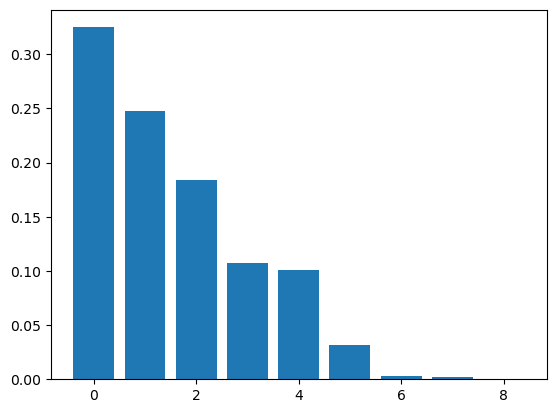

In [4]:
pca_sk = PCA()
pca_sk.fit(X0)
U0 = pca_sk.transform(X0)

plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

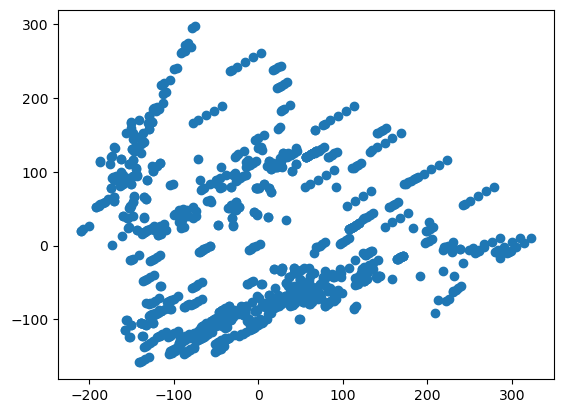

In [5]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [6]:
alpha = (N-4)/N
print(alpha)

0.996116504854369


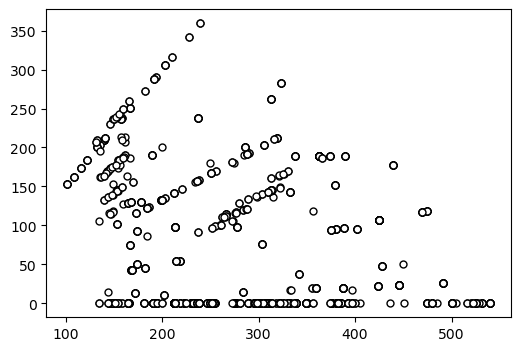

In [7]:
aa = 16/9
plt.figure(figsize=(6,4))
plt.scatter(X0[:,0], X0[:,1], c='w', s=25, edgecolors='k')
plt.show()

[281.16563107  73.89548544  54.18713592 181.56635922   6.20311165
 972.91859223 773.5788835   45.66213592  35.81783583]


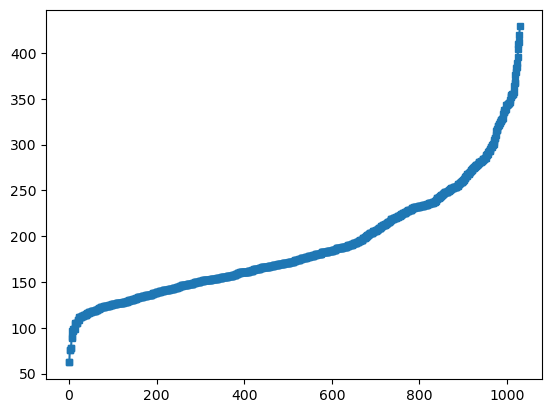

In [8]:
c0 = pca.location(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=4)
plt.show()

[280.75300971  74.17218447  54.18713592 181.68480583   6.20311165
 972.35645631 773.52354369  45.93883495  35.76067358]


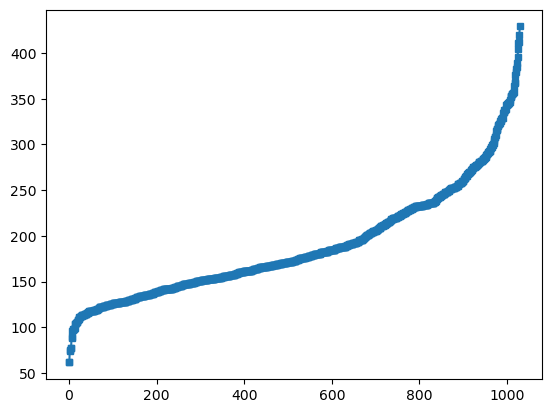

In [9]:
alpha = (N-6)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.01))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [10]:
X1 = X0 - c
X1_0 = X0 - c0

K: 60 12885.420711429058 [ 0.90444581 -0.25463357 -0.23938489  0.00542825 -0.00110179 -0.01282242
 -0.21227008  0.10031304  0.06721611]
12885.420711429058 [ 0.90444581 -0.25463357 -0.23938489  0.00542825 -0.00110179 -0.01282242
 -0.21227008  0.10031304  0.06721611]


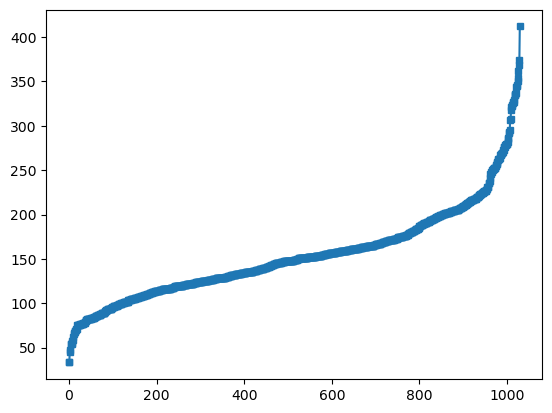

In [11]:
a1_0, L1_0 = pca.find_pc(X1_0, tol=1.0e-9, verbose=1)
print(L1_0, a1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='s', markersize=4)
plt.show()

12830.042597331023 [-0.9047169   0.26298954  0.23874    -0.00384426  0.0010482   0.0093982
  0.20176117 -0.1001086  -0.06703386]


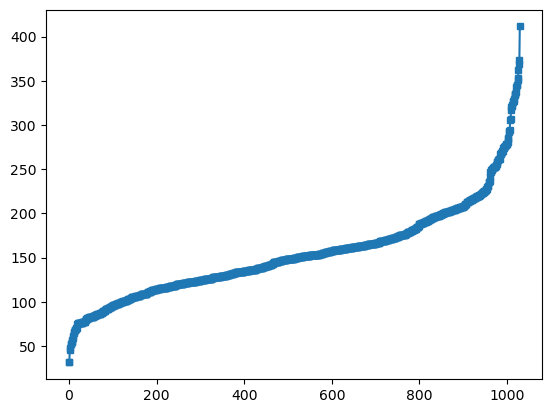

In [12]:
alpha = (N-7)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.01))
a1, L1 = pca.find_robust_pc(X1, wma, tol=1.0e-9)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=4)
plt.show()

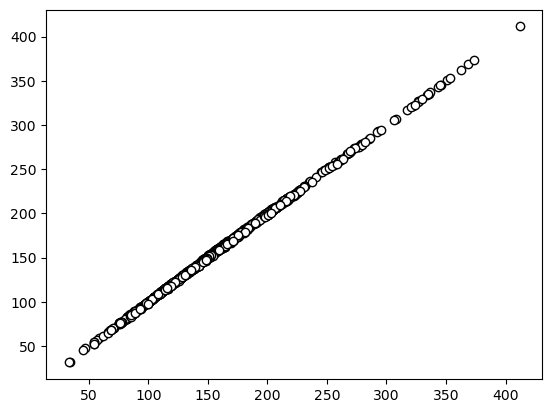

In [13]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1), c='w', edgecolors='k')
plt.show()

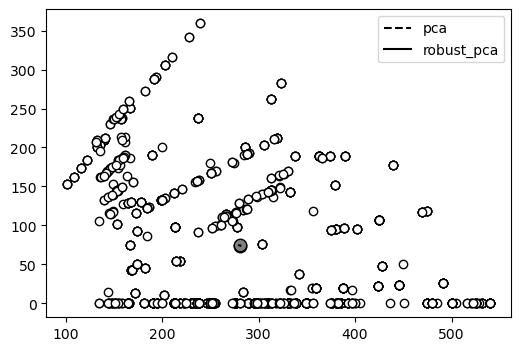

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='grey', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='grey', edgecolors='k')
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

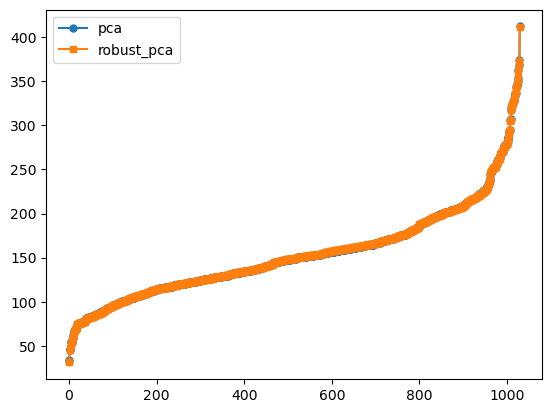

In [15]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=5, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='s', markersize=5, label='robust_pca')
plt.legend()
plt.show()

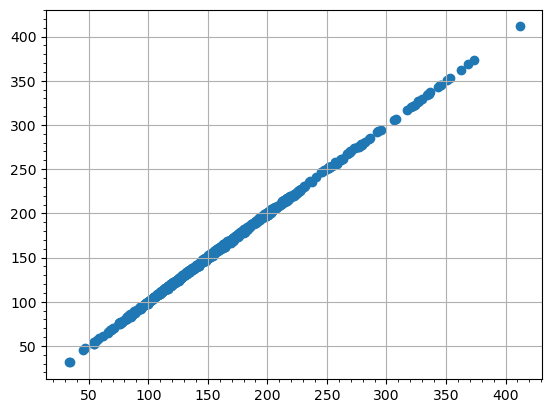

In [16]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [17]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [18]:
a2_0, L2_0 = pca.find_pc(X2_0, tol=1.0e-9)
print(L2_0, a2_0, a2_0 @ a2_0)

9815.894893157658 [ 0.02304069  0.78883703 -0.29903974  0.07549369 -0.00485714 -0.27609911
 -0.44645384  0.06999699  0.04007861] 1.0


In [19]:
alpha = (N-7)/N
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.01))
a2, L2 = pca.find_robust_pc(X2, wma, tol=1.0e-9)
print(L2, a2)
print(a1 @ a2)

9777.880565429488 [-0.03181949 -0.78216888  0.30354876 -0.07790434  0.00509065  0.28300794
  0.44721816 -0.08431762 -0.04189838]
-6.852157730108388e-17


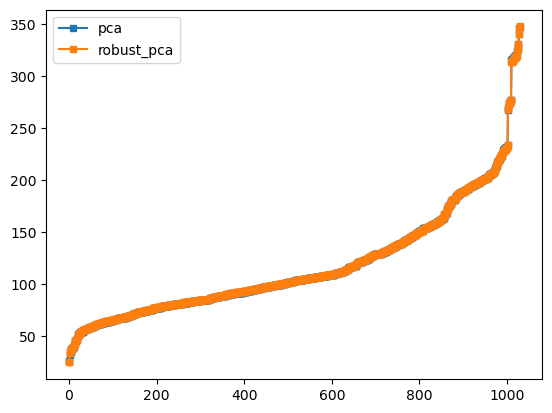

In [20]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


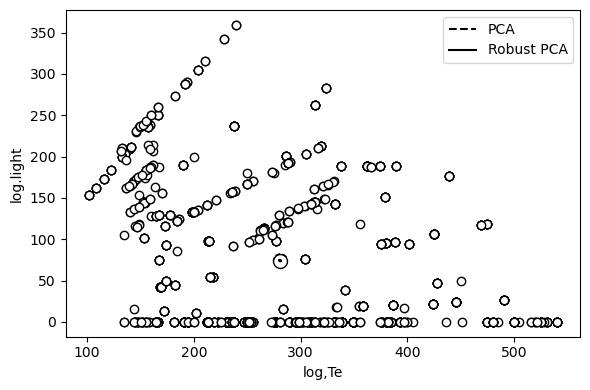

In [21]:
aa = 16/9
plt.figure(figsize=(6, 4))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]-a1_0[0], c0[0], c0[0]+a1_0[0]], [c0[1]-a1_0[1], c0[1], c0[1]+a1_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c0[0]-a2_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]-a2_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--')
plt.plot([c[0]-a1[0], c[0], c[0]+a1[0]], [c[1]-a1[1], c[1], c[1]+a1[1]], 
         c='k', label='Robust PCA')
plt.plot([c[0]-a2[0], c[0], c[0]+a2[0]], [c[1]-a2[1], c[1], c[1]+a2[1]], 
         c='k')
plt.legend()
plt.xlabel('log,Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG_0.eps')
plt.show()

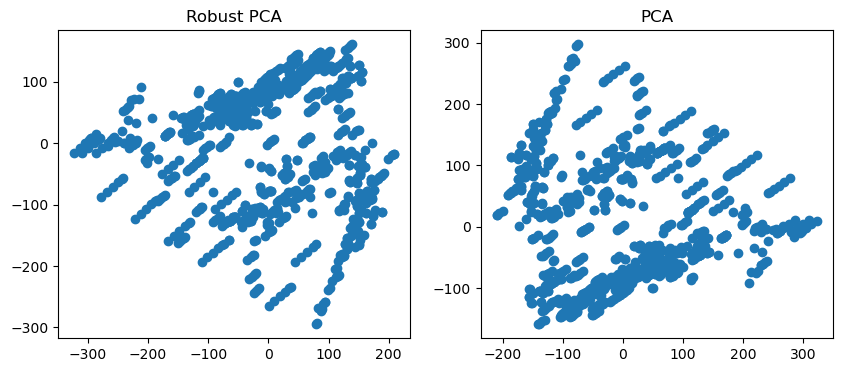

In [22]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2)
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(U1_0, U2_0)
plt.savefig('fig/robust_pca_starsCYG_transformed.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


23382355.072724324 23380955.26551045


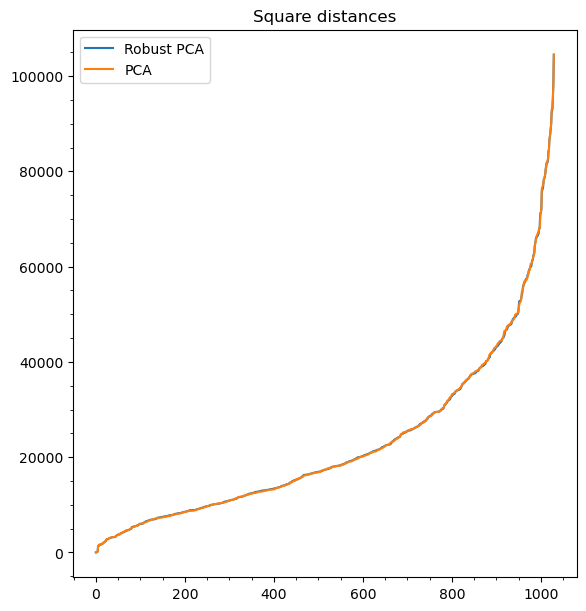

In [23]:
D = U1 * U1 + U2 * U2
D_0 = U1_0 * U1_0 + U2_0 * U2_0

print(D_0.sum(), D.sum())

plt.figure(figsize=(6.5,4*aa))
plt.title('Square distances')
plt.plot(sorted(D), label='Robust PCA')
plt.plot(sorted(D_0), label='PCA')
plt.minorticks_on()
plt.legend()
plt.savefig('fig/robust_pca_starsCYG_SD.eps')
plt.show()

In [24]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [25]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt((N-6)/N, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 8.52844127e-01  8.82772147e-01  1.03258496e+00  2.34805838e+00
   6.32914175e-01  6.46856022e-01  8.09114792e-01  1.23138488e-01
  -1.06910913e+00]
 [ 8.82772147e-01  1.13506082e+00  1.18924547e+00  2.75454691e+00
   6.32705804e-01  7.87447469e-01  9.66049713e-01  1.39066201e-01
  -9.07483018e-01]
 [ 1.03258496e+00  1.18924547e+00  1.64837297e+00  3.10899974e+00
  -9.79417953e-01  8.41886834e-01  1.08049262e+00  1.37079193e-01
  -7.49681127e-01]
 [ 2.34805838e+00  2.75454691e+00  3.10899974e+00  1.79928783e+01
   2.17819254e+01  3.29996800e+00  3.70388573e+00 -4.29182772e-01
   1.99840384e+00]
 [ 6.32914175e-01  6.32705804e-01 -9.79417953e-01  2.17819254e+01
   9.15409816e+01  3.49453251e+00  2.05692913e+00  3.06636215e-02
  -2.25662295e+00]
 [ 6.46856022e-01  7.87447469e-01  8.41886834e-01  3.29996800e+00
   3.49453251e+00  9.10574928e-01  8.66971271e-01  4.60249210e-03
  -5.47834669e-02]
 [ 8.09114792e-01  9.66049713e-01  1.08049262e+00  3.70388573e+00
   2.05692913e+00  8.6697127

In [26]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 1.60713841e-02 -1.56311613e-01  1.81666355e-01  2.71426590e-01
   1.25427559e-01  1.57633105e-01 -8.88860878e-01 -1.94623260e-01
  -1.00593195e-02]
 [ 1.75478759e-02 -1.87133738e-01  1.84330741e-01  4.30789058e-01
  -5.96618627e-02  2.22087910e-01  2.45247289e-01 -9.48422343e-02
   7.89361857e-01]
 [ 3.01003317e-03 -2.44387510e-01  1.93572841e-01  4.97477095e-01
   5.97511434e-01 -3.96956712e-01  2.36205234e-01  7.04183467e-02
  -2.82781856e-01]
 [ 2.80484854e-01 -8.27172361e-01  5.80156502e-02 -4.59127643e-01
  -1.95163274e-02 -1.18886664e-01 -1.32132395e-02  4.88633220e-02
   7.66353931e-02]
 [ 9.57670287e-01  2.62026086e-01 -4.62012101e-02  1.02407898e-01
   3.07637986e-02 -7.37233413e-04  2.71579984e-03 -2.45577653e-02
  -5.53238897e-03]
 [ 4.65206401e-02 -1.68517098e-01  7.78032540e-02  2.78204248e-01
  -2.58737525e-01  4.27339266e-01  8.68056124e-03  7.53120000e-01
  -2.62978754e-01]
 [ 3.49984170e-02 -2.24984115e-01  1.03555921e-01  2.54175555e-01
  -4.39719684e-01  2.1856059

-4.08006961549745e-15

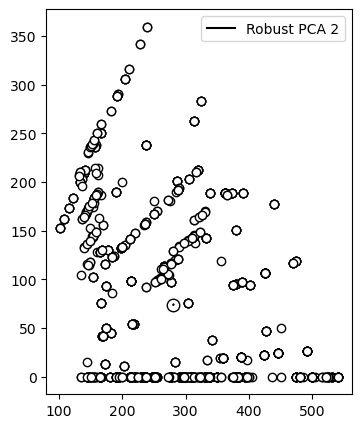

In [27]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', label='Robust PCA 2')
# plt.plot([c[0], c[0]+A[0,0]], [c[1], c[1]+A[1,0]], label='1')
# plt.plot([c[0], c[0]+A[0,1]], [c[1], c[0]+A[1,1]], label='2')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


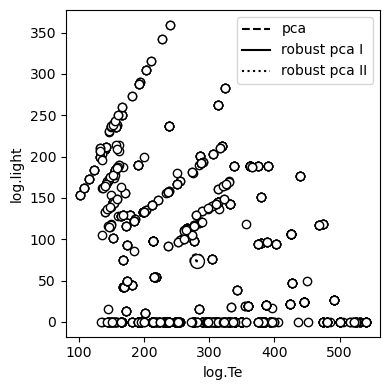

In [28]:
plt.figure(figsize=(4,4))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label='pca')
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust pca I')
plt.plot([c[0]+A[0,0], c[0], c[0]+A[0,1]], [c[1]+A[1,0], c[1], c[1]+A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG_1.eps')
plt.show()

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

NameError: name 'XY0' is not defined

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()